In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import networkx as net
from bokeh.io import output_notebook, show, save

cont = 0

In [2]:
print(os.getcwd())
print(os.listdir())

/Users/barbem4/Desktop/Vandy/Bioinformatics/Second project
['distribution plot with power law.png', 'distribution plot.png', '.DS_Store', 'PP-Pathways_ppi.xlsx', 'First graph.png', 'pathways-network.html', 'PP-Pathways_ppi.csv', 'Net analysis.ipynb', 'PP-Pathways_ppi.txt']


In [3]:
df = pd.read_csv('PP-Pathways_ppi.csv')
df


,1394,2778
0,6331,17999
1,122704,54460
2,2597,2911
3,4790,79155
4,6146,101929876
...,...,...
342347,10969,4670
342348,6774,55748
342349,23299,399693
342350,9247,337967


In [29]:
edges = [(t,v) for t,v in df.values]
edges_red = [(t,v) for t,v in df.values if (t>2500000)]
print(len(edges), len(edges_red))

342352 1113


In [30]:
#Build the graph
G = net.Graph()

In [31]:
G.add_edges_from(edges)
G_red.add_edges_from(edges_red)

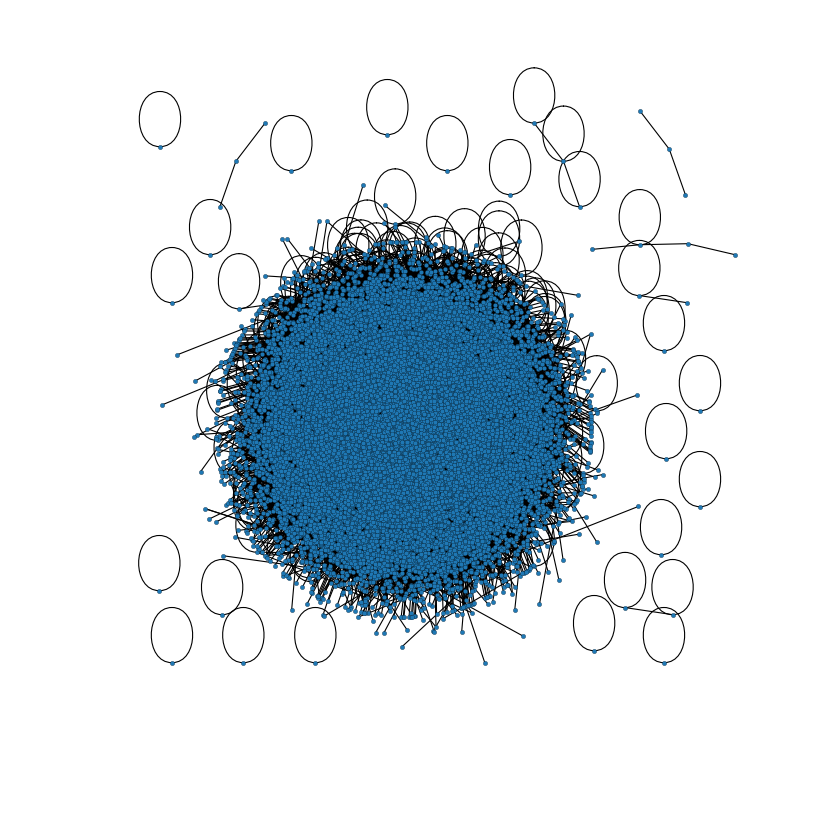

In [44]:
###########################
####Network plotting###########
###TAKES LONG TO PLOT######
###########################

STOP = input('Do you really want to rerun the network graph? (y/n)')


if STOP =='y':
    plt.figure(figsize = (10,10))
    net.draw(G, pos = net.nx_pydot.graphviz_layout(G),node_size = 16,linewidths = 0.2)
    plt.savefig(os.getcwd()+'/First graph.png')
else:
    print('Graph not rerun')



<Figure size 400x400 with 0 Axes>

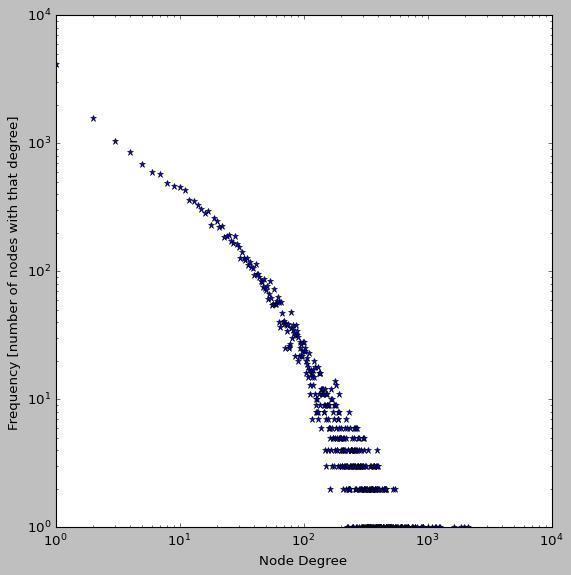

<Figure size 640x480 with 0 Axes>

In [49]:
plt.style.use('classic')

plt.figure(figsize=(5,5))

degree_freq = net.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8,8)) 
plt.loglog(degrees, degree_freq,'*') 
plt.xlabel('Node Degree',fontsize = 12)
plt.ylabel('Frequency [number of nodes with that degree]', fontsize = 12)

plt.show()

plt.savefig(os.getcwd()+'/distribution plot.png')


In [51]:
def powerfit(x, y):
    """line fitting on log-log scale"""
    k, m = np.polyfit(np.log10(x), np.log10(y), 1)
    return 10**m * x**(k),k

gamma= -1.55


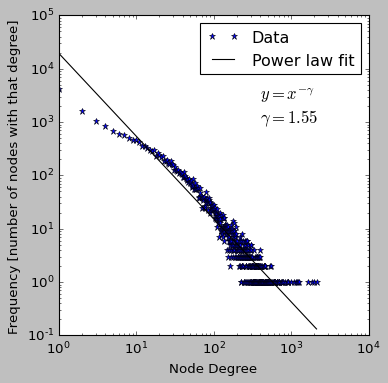

In [67]:
#Fit a power law to the data and get gamma coefficient


degree_freq = net.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(5,5)) 
plt.loglog(degrees, degree_freq,'*') 
plt.xlabel('Node Degree',fontsize = 12)
plt.ylabel('Frequency [number of nodes with that degree]', fontsize = 12)

#Remove where degree freq is zero
idxs = np.where(np.array(degree_freq) != 0)[0]
degree_freq = list(map(degree_freq.__getitem__, idxs))
degrees = list(map(degrees.__getitem__, idxs))

ys,gamma = powerfit(degrees, degree_freq)

plt.plot(degrees,ys,color='black')
plt.legend(['Data','Power law fit'])
plt.text(400,1000,r'$y = x^{-\gamma} $'+'\n'+ '$\gamma = $' + "$"+str(np.round(abs(gamma), decimals = 2))+'$', fontsize = 15)

print('gamma=',np.round(gamma, decimals = 2))



plt.savefig(os.getcwd()+'/distribution plot with power law.png')

# Uday code from here

In [74]:
from bokeh.io import output_notebook, output_file, show, save
from bokeh.plotting import figure, from_networkx
from bokeh.models import (BoxSelectTool, Circle,BoxZoomTool,ResetTool, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool, ColumnDataSource)
from bokeh.palettes import Spectral4


In [70]:
output_notebook()

Loading BokehJS ...

In [122]:
G = net.read_edgelist('PP-Pathways_ppi.csv', delimiter=',', nodetype=int, encoding="utf-8")

In [123]:
#Set relevant nodes list
relevant_nodes  = [7157,4089,5594,2475,1956,3815,7471,613,111,2984,596,836]

In [132]:
#highlight with color the proteins of interest
SELECTED, REST = "red", "blue"
node_color = []
node_alpha = []

for node in G.nodes(data=True):
    node_color.append(SELECTED if node in relevant_nodes else REST)
    node_alpha.append(0.75 if node in relevant_nodes else 0.25)


In [134]:

plot = Plot(width=400, height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Pathways Network"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())


graph_renderer = from_networkx(G, net.spring_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.data_source.data['colors'] = node_color
graph_renderer.node_renderer.data_source.data['alpha'] = node_alpha


graph_renderer.node_renderer.glyph = Circle(size=2, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=2, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=2, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="black", line_alpha=0.2, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=1)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("pathways-network.html")
show(plot)
